# ML210-Assignment 6: Resampling Methods

Dataset needed:
UCI Airfoil Self-Noise Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('diabetes.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Validation Set

Make an 80/20 train/test split.

In [38]:
X = data.drop(['Outcome'], axis=1)
y = data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Fit a logistic regression model on the training data.

In [39]:
from sklearn import linear_model

#Create linear regression object
regr = linear_model.LogisticRegression()
regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predict the test data.

In [40]:
y_pred = regr.predict(X_test)

Plot the ROC curve and compute the AUC score

AUC: 0.8194674012855832


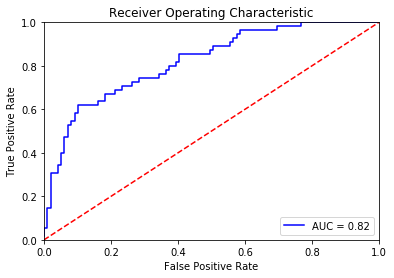

In [46]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = regr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Calculate the accuracy metric of the observations in the test set.

In [47]:
# The mean squared error
from sklearn.metrics import mean_squared_error
import numpy as np

lr_acc = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy: {}".format(lr_acc))

Accuracy: 75.97402597402598


## Cross-Validation

## *k-*Fold Cross-Validation

In few sentences, explain how K-fold procedure work.

Perform linear regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.

In [50]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(regr, X_train, y_train, scoring="accuracy", cv=10)

print(scores.mean())

0.7669881560944489


## The Bootstrap

Print the target class distribution (We have almost twice as much 0s than 1s)


In [52]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [53]:
# Separate majority and minority classes
majority_class = data[data.Outcome==0]
minority_class = data[data.Outcome==1]
 
# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=500,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])
 
# Display new class counts 
data_upsampled.Outcome.value_counts()
#As you can see, the new DataFrame has more observations than the original, and the ratio of the two classes is now 1:1

1    500
0    500
Name: Outcome, dtype: int64

Let's train another model using Logistic Regression, this time on the balanced dataset

In [56]:
# Separate input features (X) and target variable (y)
X = data_upsampled.drop('Outcome', axis=1)
y = data_upsampled.Outcome

#Perform train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
 
# Train model
regr = linear_model.LogisticRegression()
regr.fit(X_train, y_train)
 
# Predict on training set
y_pred = regr.predict(X_test)
 
# How's our accuracy? Has it improved? Comment
lr_acc = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy: {}".format(lr_acc))

Accuracy: 78.5
